In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import autonotebook as tqdm

/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_25191/3577258363.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm import autonotebook as tqdm


## String vibration

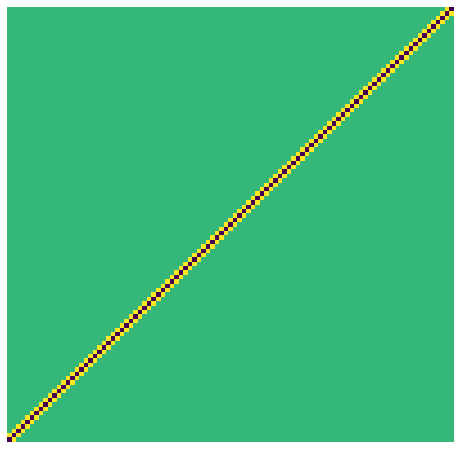

In [2]:
n = 99
L = 1.
h = L / (n + 1) 
k = 2
kh = k * h

# Tri-Diagonal Linear System: Ax = b
x = np.arange(h, L, h)[:, None]
a = np.zeros((n, n))
f = np.zeros((n, 1))

# Offdiagonal values
o = 1.

a[0, 0] = kh **2 - 2
a[0, 1] = o

for i in range(1, n-1):
    a[i, i] = a[0, 0]
    a[i, i-1] = o
    a[i, i+1] = o

    a[n-1, n-1] = a[0, 0]
    a[n-1, n-2] = o

plt.figure(figsize=(8, 8))
plt.pcolormesh(a)
plt.axis('off');

del n, L, h, k, kh, x, a, f, o

In [96]:
def vib_string(ylims, o=1., k_mul=1.):
    ylim1, ylim2, ylim3, ylim4 = ylims

    n = 99
    L = 1.
    h = L / (n + 1)
    k = 2 * np.pi * k_mul
    kh = k * h

    # Tri-Diagonal Linear System: Ax = b
    x = np.arange(h, L, h)[:, None]
    a = np.zeros((n, n))
    f = np.zeros((n, 1))

    # Offdiagonal values
    o = o

    a = (np.triu(np.ones((n, n)), -1) * np.tril(np.ones((n, n)), 1)) * o
    a[np.arange(n), np.arange(n)] = kh ** 2 - 2

    # a[0, 0] = kh **2 - 2
    # a[0, 1] = o

    # for i in tqdm.trange(1, n-1):
    #     a[i, i] = a[0, 0]
    #     a[i, i-1] = o
    #     a[i, i+1] = o

    # a[n-1, n-1] = a[0, 0]
    # a[n-1, n-2] = o


    # Hanning window load
    nf = round((n + 1) / 3)
    nw = round((n + 1) / 6)
    nw = min(min(nw, nf - 1), n - nf)
    nw1 = nf - nw
    nw2 = nf + nw
    f[nw1-1:nw2] = h **2 * np.hanning(nw2 - nw1 + 1)[:, None]

    fig, axes = plt.subplots(2, 2, figsize=(24, 8))

    [[ax1, ax3], [ax2, ax4]] = axes

    ax1.plot(x.squeeze(), f.squeeze(), 'r', linewidth=2)
    ax1.set_title('Force Distribution', fontsize=14);
    ax1.set_xlim([0, 1])
    ax1.set_ylim(ylim1)

    # Exact solution
    y = np.linalg.inv(a) @ f

    ax2.plot(x.squeeze(), y.squeeze(), 'b', linewidth=2)
    ax2.legend([f'Off-diag = {o}'], fontsize=14)
    ax2.set_title('String displacement (Exact)', fontsize=14);
    ax2.set_xlabel('x', fontsize=14);
    ax2.set_xlim([0, 1])
    ax2.set_ylim(ylim2)
    b = -a
    c = np.zeros((n, 1));

    b[np.arange(n), np.arange(n)] = 0
    aii = np.diag(a)[:, None]
    b = b / aii
    c = f / aii

    nj = 100
    xj = f
    xgs = f

    nc = 6
    col=['r', 'lime', 'b', 'c', 'm', 'y']


    for j in range(nj):
        # jacobi
        xj = c + b @ xj
        # gauss-seidel
        xgs[0] = c[0] + b[0, 1:] @ xgs[1:]
        for i in range(1, n-1):
            xgs[i] = c[i] + b[i, :i] @ xgs[:i] + b[i, i+1:] @ xgs[i+1:]

        xgs[n - 1] = c[n-1] + b[n-1, :n-1] @ xgs[:n-1]
        # (mod(j-1,nc)+1 -> ((mod(j-1,nc)+1) - 1 -> mod(j-1, nc)
        cc = col[j % nc]
        ax3.plot(x.squeeze(), xj.squeeze(), cc)
        ax3.set_title('Jacobi', fontsize=14)
        ax4.plot(x.squeeze(), xgs.squeeze(), cc)
        ax4.set_title('Gauss-Seidel', fontsize=14);
        ax4.set_xlabel('x', fontsize=14);

    ax3.set_xlim([0, 1])
    ax4.set_xlim([0, 1])
    ax3.set_ylim(ylim3)
    ax4.set_ylim(ylim4)
    ineq = ">" if kh > 2 else ("<" if kh < 2 else "=")
    plt.suptitle(f'o={o}, k=2*pi*{k_mul}, h={h}, kh{ineq}2', fontsize=24, color='blue')

    plt.tight_layout();

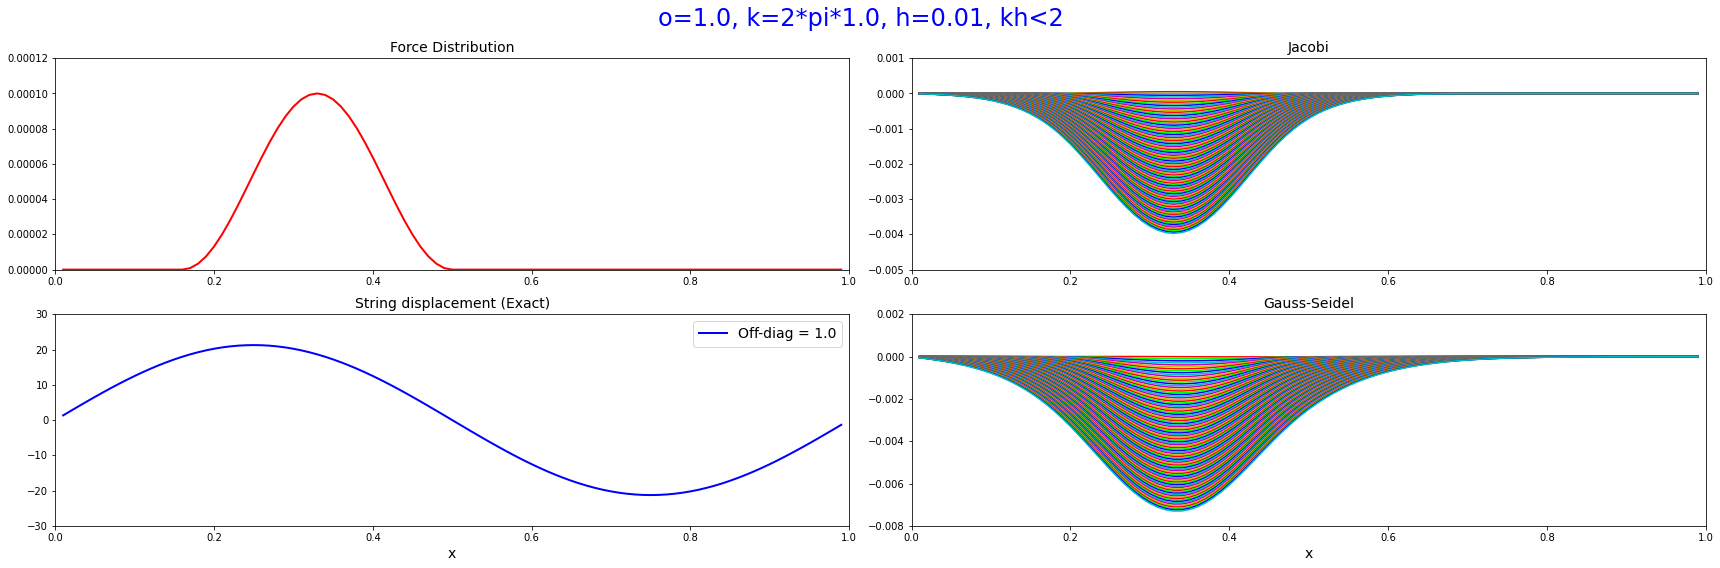

In [97]:
vib_string(([0, 1.2e-4], [-30, 30], [-5e-3, 1e-3], [-8e-3, 2e-3]))

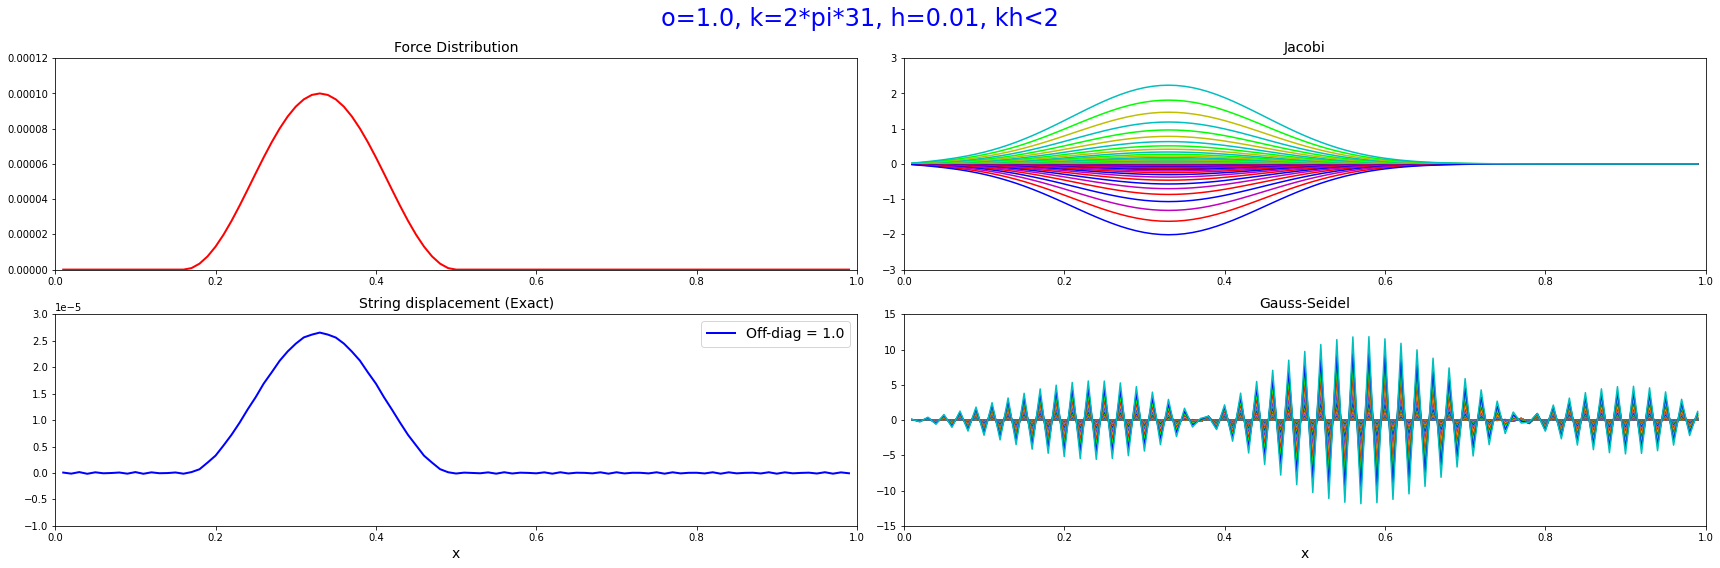

In [98]:
vib_string(
    [[0, 1.2e-4], [-1e-5, 3e-5], [-3, 3], [-15, 15]],
    k_mul=31)

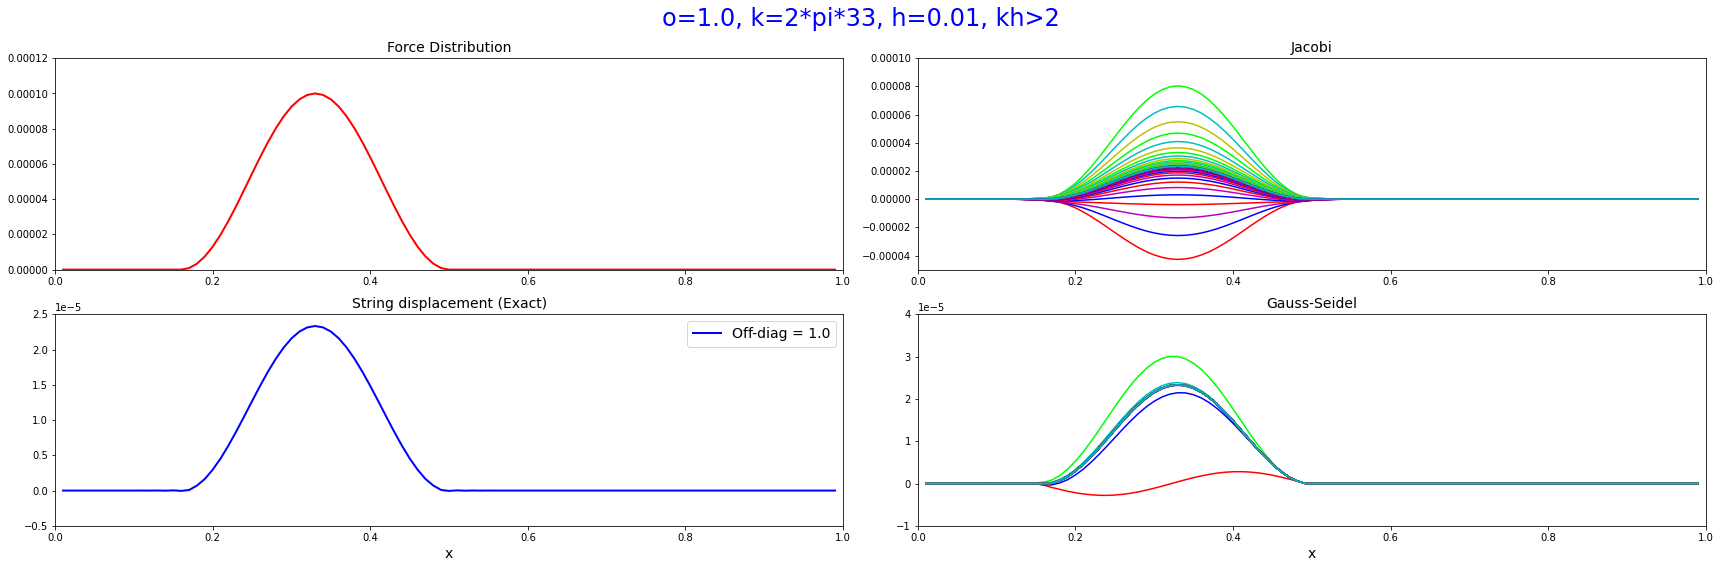

In [99]:
vib_string(
    [[0, 1.2e-4], [-0.5e-5, 2.5e-5], [-5e-5, 10e-5], [-1e-5, 4e-5]],
    k_mul=33
)

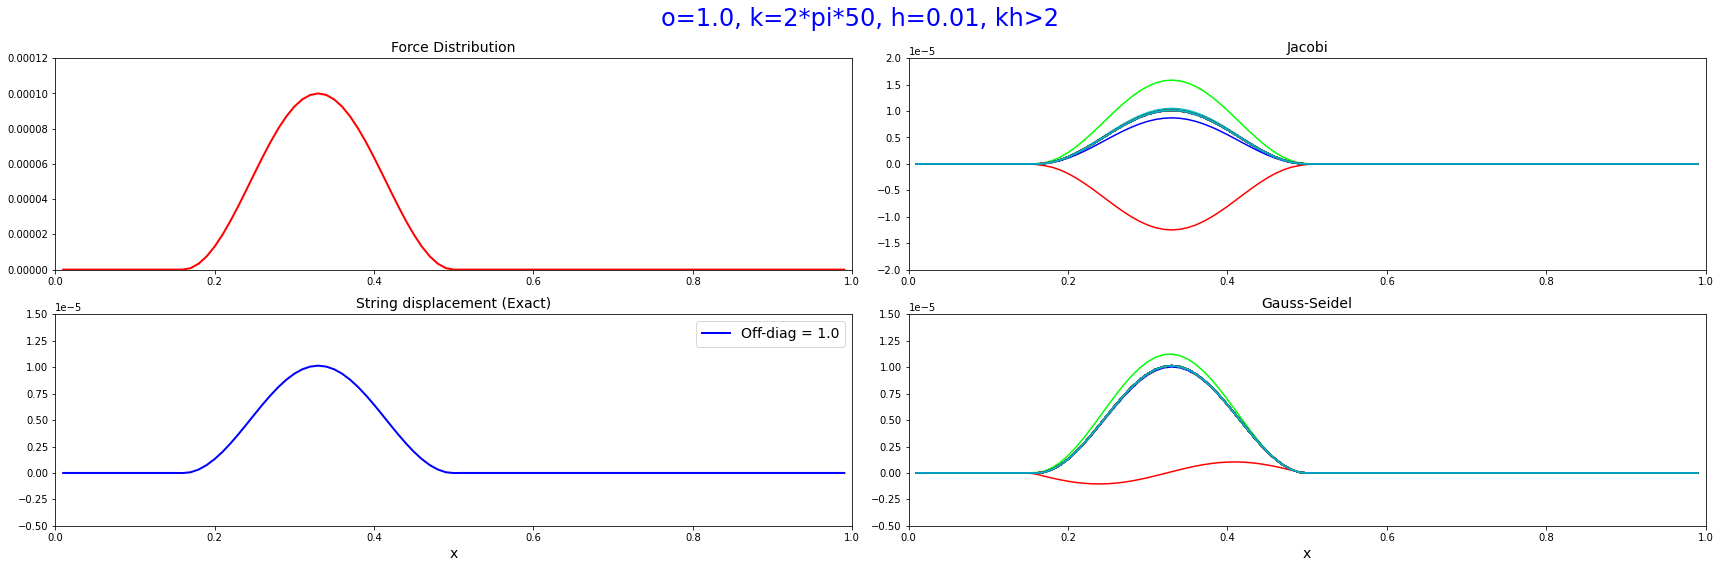

In [100]:
vib_string(
    [[0, 1.2e-4], [-5e-6, 15e-6], [-2e-5, 2e-5], [-5e-6, 15e-6]],
    k_mul=50
)

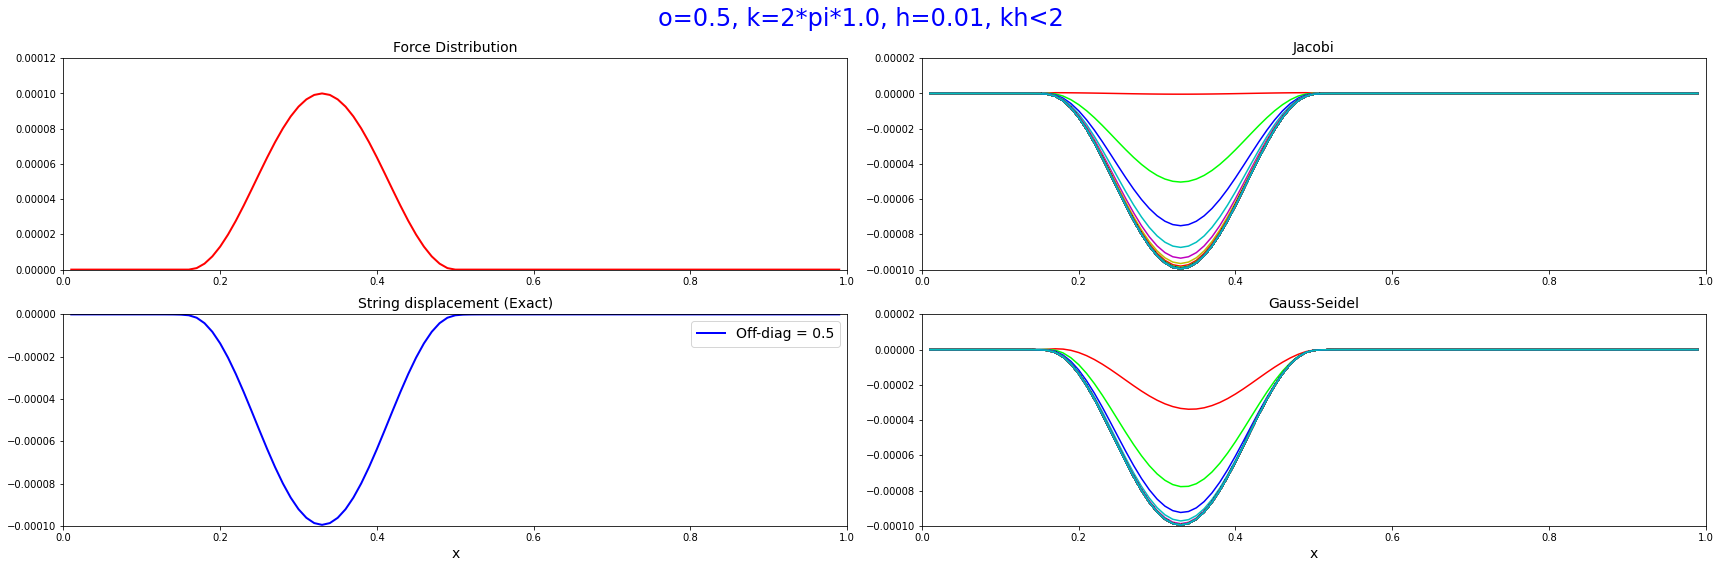

In [102]:
vib_string(
    [[0, 1.2e-4], [-1e-4, 0], [-10e-5, 2e-5], [-10e-5, 2e-5]],
    o=0.5
)

## Conjugate Gradient Method

In [356]:
def cgm_new(ex=1):
    assert ex in [1, 2]
    
    if ex==1:
        A = np.array([[2, 1], 
                      [1, 2]])
        b = np.array([[4],
                      [5]])
        x0 = np.stack([[1.],
                       [1.75]])
        xmin, xmax, dx = 0.7, 1.4, 0.01
        ymin, ymax, dy = 1.7, 2.4, 0.01
        
    elif x == 2:
        A = np.array([[3, 2], 
                      [2, 6]])
        b = np.array([[2],
                      [-8]])
        x0 = np.stack([[-2],
                       [-2]])
        xmin, xmax, dx = -4, 6, 0.01
        ymin, ymax, dy = -6, 4, 0.01
    
    i = 0
    xsd = x0.copy()
    residual = 1
    
    
    while residual > 0.00001:
        r = b - A @ xsd[:, i:i+1]
        i+=1
        # [2, i + 1] -> [2, i + 2]
        xsd = np.c_[xsd, xsd[:, i-1:i] + (r.T @ r) * r / (r.T @ A @ r)]
        residual = (r.T @ r)
        
    i = 0
    xcg = x0.copy()
    v = b - (A @ xcg[:, :1])
    r = v
    
    residual = 1;
    while residual > 0.00001:
        alpha = v.T @ r / (v.T @ A @ v)
        i = i + 1
        xcg = np.c_[xcg, xcg[:, i-1:i] + alpha * v]
        r = r - alpha * A @ v
        beta = - (v.T @ A @ r) / (v.T @ A @ v)
        v = r + beta * v
        residual = r.T @ r
        
    def f(x, y):
        return ((x**2 * A[0, 0] + y**2 * A[1, 1] 
                + (x * y)  * (A[0, 1] + A[1, 0]))/2
                - (b[0] * x) - (b[1] * y))
    
    X, Y = np.meshgrid(np.arange(xmin, xmax + dx, dx),
                       np.arange(ymin, ymax + dx, dx))
    plt.figure(figsize=(9, 8));
    plt.plot(xcg[0], xcg[1],'-r+',linewidth=3)
    plt.plot(xsd[0], xsd[1],linestyle='--', color='lime', linewidth=3)
    
    plt.contour(X, Y, f(X, Y), f(xsd[0], xsd[1])[::-1], linewidths=3, cmap=plt.cm.RdBu_r);
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('X')
    plt.ylabel('Y');
    plt.grid(linestyle='-.');
    plt.axis('equal');

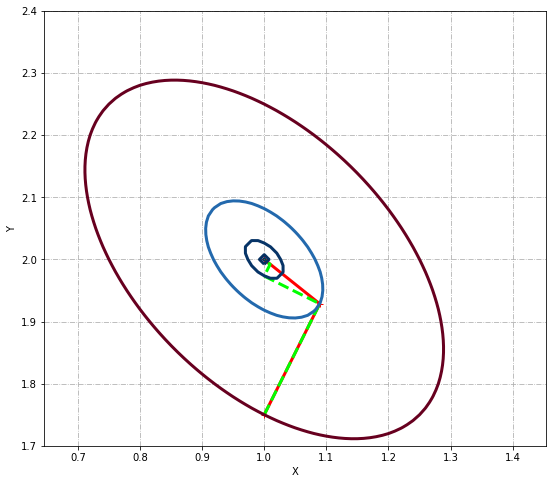

In [357]:
cgm_new()